In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json('../Data2.json')
df.sort_index(inplace=True)
df.year.value_counts().sort_index()

1378      1
1380      1
1384      1
1387      1
2000      8
2001      6
2002      1
2003      9
2004     13
2005     13
2006     11
2007     31
2008    200
2009    243
2010    460
2011    429
2012    504
2013    462
2014    412
2015    322
2016    286
2017     89
2018      8
85        1
87        1
n/a      13
Name: year, dtype: int64

In [3]:
df.year.replace({'85':'2006','87':'2008','1387':'2008','1378':'2000','1380':'2001','1384':'2005'},inplace=True)
df.year.value_counts().sort_index()

2000      9
2001      7
2002      1
2003      9
2004     13
2005     14
2006     12
2007     31
2008    202
2009    243
2010    460
2011    429
2012    504
2013    462
2014    412
2015    322
2016    286
2017     89
2018      8
n/a      13
Name: year, dtype: int64

### 13 missing data in Year column

In [4]:
df.year=df.year.apply(pd.to_numeric, errors='coerce',downcast='unsigned').fillna(np.nan)

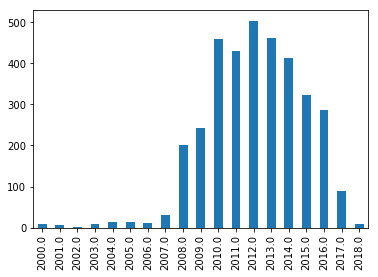

In [5]:
cln=df.year.value_counts().sort_index()
cln.plot(kind='bar')
plt.show()

## Filling Missing Data
We can see in applyabroad.com/forum web portal when we submit results , it gives an ID for admission result which is Incremental. So we're going to fill missing data with average of "YEAR" in the next and previous available record.

In [6]:
df.year[df.year.isnull()]

568    NaN
1859   NaN
1904   NaN
1951   NaN
1958   NaN
2479   NaN
2771   NaN
2995   NaN
3286   NaN
3429   NaN
3521   NaN
3782   NaN
4152   NaN
Name: year, dtype: float64

In [7]:
for i in df.year.index:
    if df.year[i]>0:continue
    nex=i
    while True:
        nex+=1
        try:
            if nex>df.year.index[-1]:
                df.year.set_value(i,round(df.year.mean()))
                break
            if df.year[nex]>0:
                df.year.set_value(i,df.year[nex])
        except:
            pass
cln2=df.year.value_counts().sort_index()
cln2        

2000.0      9
2001.0      7
2002.0      1
2003.0      9
2004.0     13
2005.0     14
2006.0     12
2007.0     31
2008.0    202
2009.0    243
2010.0    460
2011.0    429
2012.0    517
2013.0    462
2014.0    412
2015.0    322
2016.0    286
2017.0     89
2018.0      8
Name: year, dtype: int64

In [8]:
df.year[df.year.isnull()]

Series([], Name: year, dtype: float64)

### Here you can see changes in our series after setting new values

In [9]:
cln2-cln

2000.0     0
2001.0     0
2002.0     0
2003.0     0
2004.0     0
2005.0     0
2006.0     0
2007.0     0
2008.0     0
2009.0     0
2010.0     0
2011.0     0
2012.0    13
2013.0     0
2014.0     0
2015.0     0
2016.0     0
2017.0     0
2018.0     0
Name: year, dtype: int64

In [10]:
# Saving
df.to_json('Data_FixedYear.json',date_format='utf8')

In [11]:
df.year.describe()

count    3526.000000
mean     2012.084515
std         2.687339
min      2000.000000
25%      2010.000000
50%      2012.000000
75%      2014.000000
max      2018.000000
Name: year, dtype: float64